C:\Users\1\AppData\Local\Temp\ipykernel_9648\2137160929.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['num'], palette="viridis")


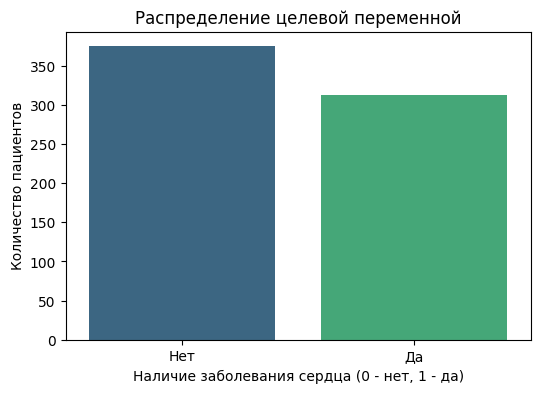

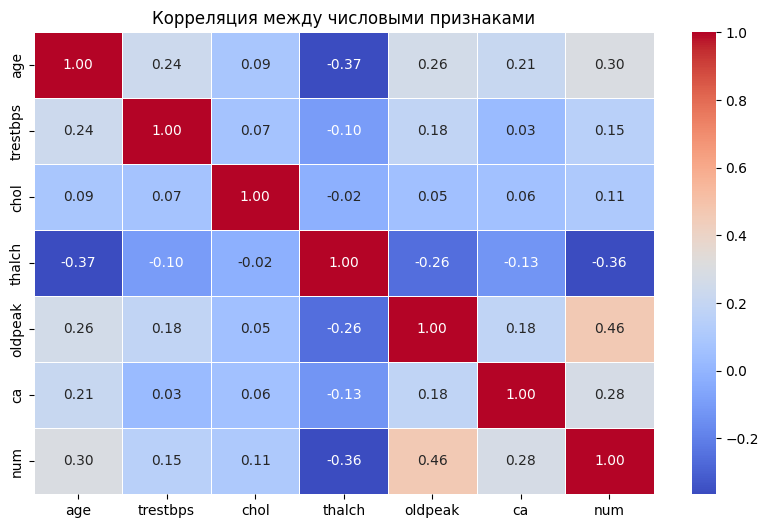

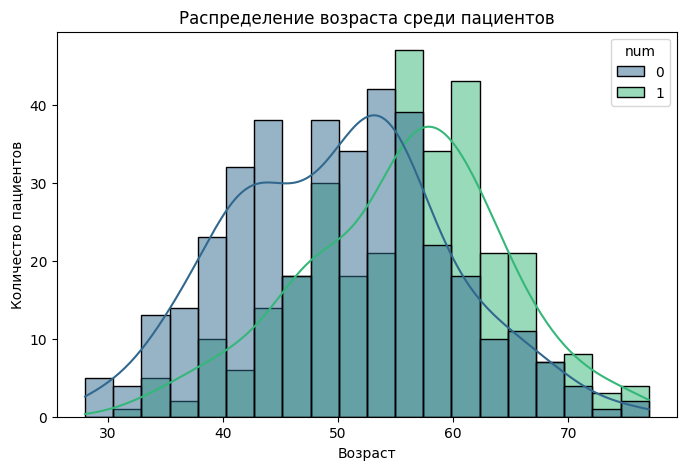


üìä Model Performance Metrics:
Accuracy: 0.7754
Precision: 0.7500
Recall: 0.7619
F1 Score: 0.7559
ROC AUC Score: 0.8652


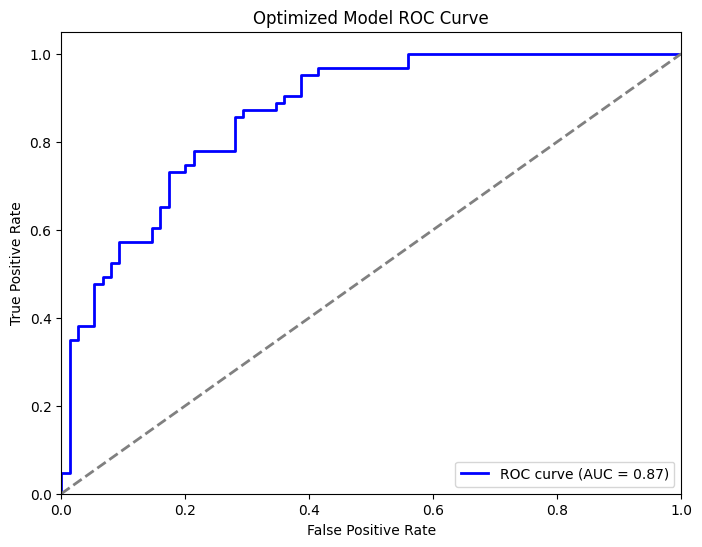

C:\Users\1\AppData\Local\Temp\ipykernel_9648\2137160929.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette="viridis")


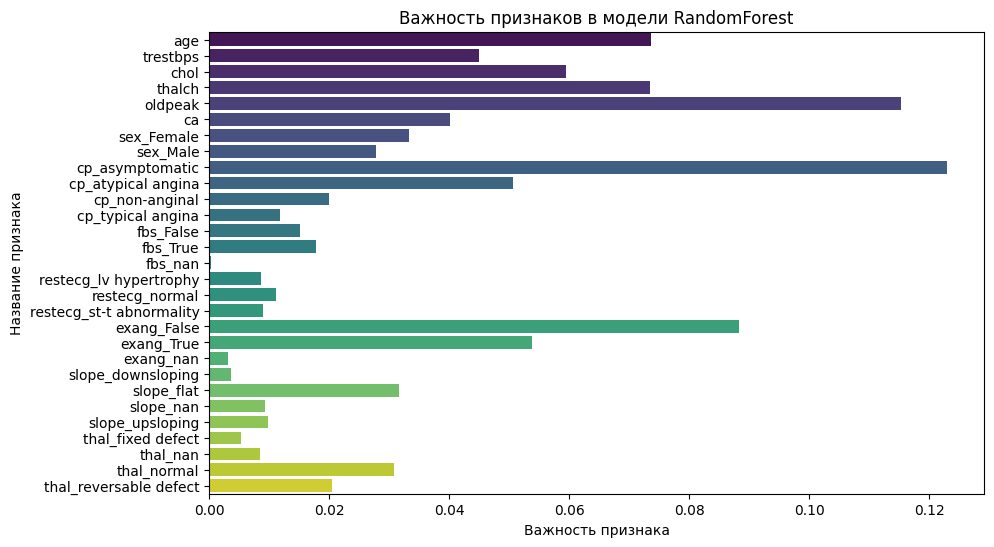

In [2]:
# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
file_path = "heart_disease_uci.csv"  # –£–∫–∞–∂–∏—Ç–µ –ø—É—Ç—å –∫ —Ñ–∞–π–ª—É
df = pd.read_csv(file_path)

# –£–¥–∞–ª–µ–Ω–∏–µ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤
df = df.drop_duplicates()

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –≤ –±–∏–Ω–∞—Ä–Ω—ã–π —Ñ–æ—Ä–º–∞—Ç (0 - –Ω–µ—Ç –±–æ–ª–µ–∑–Ω–∏, 1 - –µ—Å—Ç—å –±–æ–ª–µ–∑–Ω—å)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–æ–≤—ã—Ö –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ –º–µ—Ç–æ–¥–æ–º IQR
def remove_outliers(df, numerical_features):
    Q1 = df[numerical_features].quantile(0.25)
    Q3 = df[numerical_features].quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_cleaned

# –£–¥–∞–ª—è–µ–º –≤—ã–±—Ä–æ—Å—ã
df = remove_outliers(df, numerical_features)

# –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º
imputer = SimpleImputer(strategy="mean")
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –±—É–ª–µ–≤—ã –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≤ —Å—Ç—Ä–æ–∫–∏
df[categorical_features] = df[categorical_features].astype(str)

# üìä 1. –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
plt.figure(figsize=(6, 4))
sns.countplot(x=df['num'], palette="viridis")
plt.xlabel("–ù–∞–ª–∏—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞ (0 - –Ω–µ—Ç, 1 - –¥–∞)")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π")
plt.xticks(ticks=[0, 1], labels=["–ù–µ—Ç", "–î–∞"])
plt.show()

# üìä 2. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É —á–∏—Å–ª–æ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features + ['num']].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É —á–∏—Å–ª–æ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏")
plt.show()

# üìä 3. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–æ–≤ —Å—Ä–µ–¥–∏ –±–æ–ª—å–Ω—ã—Ö –∏ –∑–¥–æ—Ä–æ–≤—ã—Ö –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="age", hue="num", kde=True, palette="viridis", bins=20)
plt.xlabel("–í–æ–∑—Ä–∞—Å—Ç")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ —Å—Ä–µ–¥–∏ –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤")
plt.show()

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X = df.drop(columns=['id', 'origin', 'num'])
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ —Å –ø–æ–º–æ—â—å—é GridSearchCV
model = RandomForestClassifier(random_state=42)
pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', model)])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ—Å–ª–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª—å—é
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# –ò—Ç–æ–≥–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏
final_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC Score": roc_auc_score(y_test, y_proba)
}

# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
print("\nüìä Model Performance Metrics:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è ROC-–∫—Ä–∏–≤–æ–π
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Optimized Model ROC Curve')
plt.legend(loc='lower right')
plt.show()

# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importances = best_model.named_steps['classifier'].feature_importances_
cat_feature_names = best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(cat_feature_names)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.xlabel("–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞")
plt.ylabel("–ù–∞–∑–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞")
plt.title("–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –º–æ–¥–µ–ª–∏ RandomForest")
plt.show()


‚úÖ –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

* –£–¥–∞–ª–µ–Ω–∏–µ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤
* –û–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ –∏ —É–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ (–º–µ—Ç–æ–¥ IQR)
* –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
* –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

‚úÖ –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è

* –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è RandomForestClassifier
* –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ train/test
* –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (GridSearchCV)

‚úÖ –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º –∫–∞—á–µ—Å—Ç–≤–∞

* Accuracy (–¢–æ—á–Ω–æ—Å—Ç—å)
* Precision (–¢–æ—á–Ω–æ—Å—Ç—å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π)
* Recall (–ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å)
* F1 Score (–°–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –º–µ—Ç—Ä–∏–∫–∞)
* ROC AUC Score (–ü–ª–æ—â–∞–¥—å –ø–æ–¥ ROC-–∫—Ä–∏–≤–æ–π)

‚úÖ –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏

* ROC-–∫—Ä–∏–≤–∞—è (–û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏)
* –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–ö–∞–∫–∏–µ —Ñ–∞–∫—Ç–æ—Ä—ã –≤–ª–∏—è—é—Ç –Ω–∞ –ø—Ä–æ–≥–Ω–æ–∑)